In [2]:
%run dataset_config.ipynb
import import_ipynb

In [2]:
import os
import numpy as np
import cv2 as cv
import json
import matplotlib.pyplot as plt

# Image processing functions

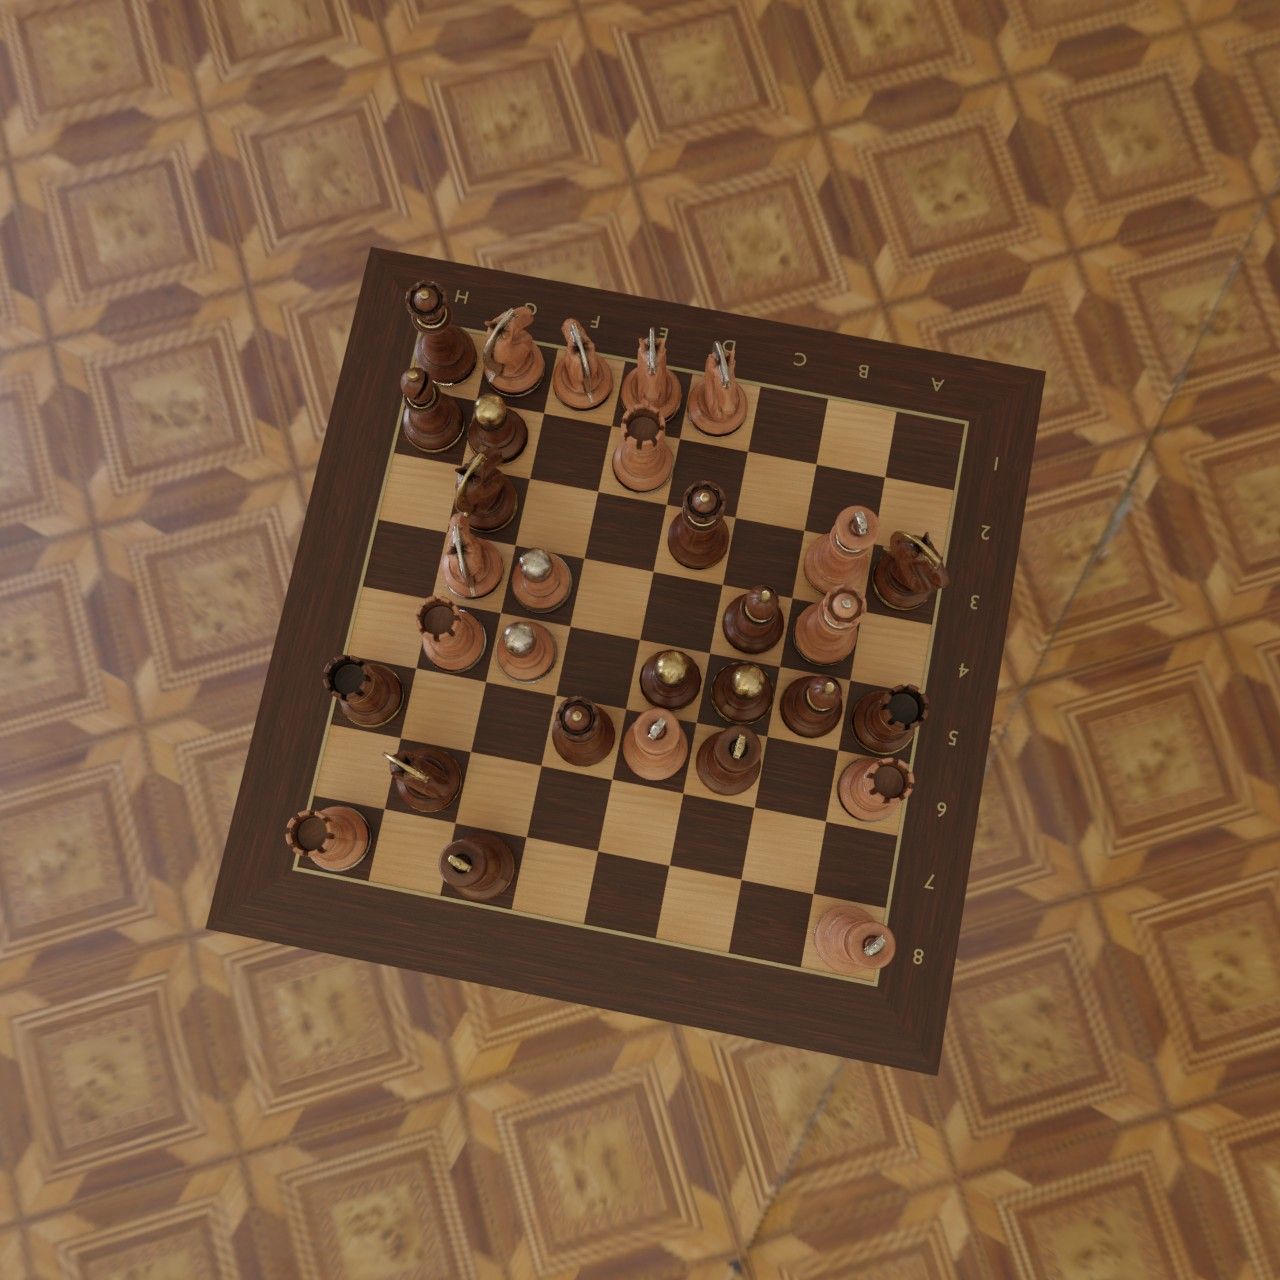

In [3]:
from IPython.display import display, Image
filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'

def read_image(file_image):
    return cv.imread(file_image)

display(Image(filename))

## Canny edge detection with Gaussian blur - default vs automatic

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

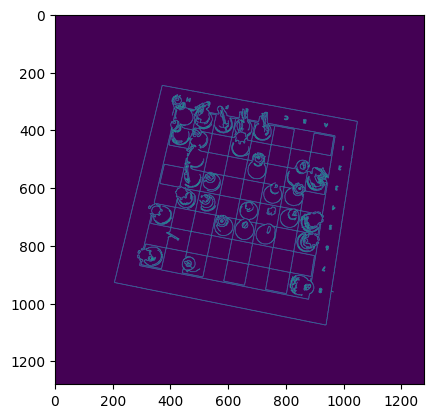

In [4]:
def canny_edge_response(img, low_thr=10, high_thr=200):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # blur = cv.blur(gray, (2,2))
    blur = cv.GaussianBlur(gray, (3, 3), 0)
    canny_img = cv.Canny(blur, low_thr, high_thr, apertureSize=3)
    plt.imshow(canny_img)
    return canny_img

def automatic_canny_edge_response(img, sigma=0.33):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # blur = cv.blur(gray, (2,2))
    blur = cv.GaussianBlur(gray, (3, 3), 5)

    v = np.median(blur)
    low_thr = int(max(0, (1.0 - sigma) * v))
    high_thr = int(min(255, (1.0 + sigma) * v))
    canny_img = cv.Canny(blur, low_thr, high_thr)

    plt.imshow(canny_img)
    return canny_img

canny_edge_response(read_image(filename))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

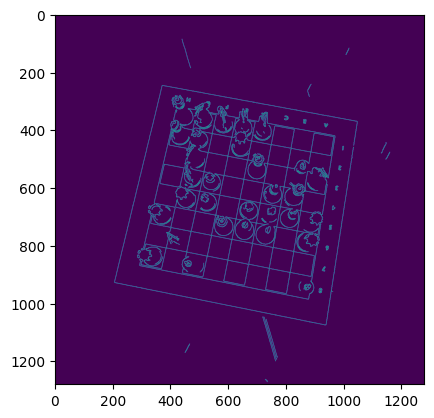

In [6]:
automatic_canny_edge_response(read_image(filename))

## Adaptive thresholding version

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

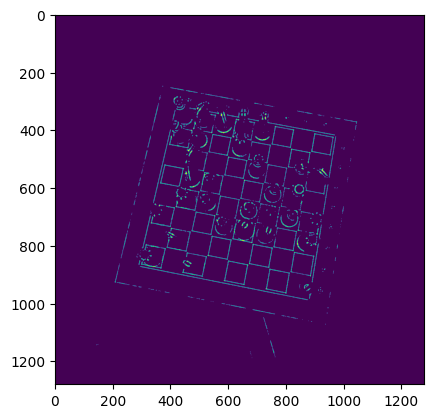

In [117]:
def adaptive_gaussian_threshold(img, blockSize=199, C=5):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.blur(gray, (5, 5))
    bin_img = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize, C)
    plt.imshow(bin_img)
    return bin_img

def adaptive_mean_threshold(img, blockSize=199, C=5):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.blur(gray, (5, 5))
    bin_img = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize, C)
    plt.imshow(bin_img)
    return bin_img

adaptive_gaussian_threshold(read_image(filename), 9, 7)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

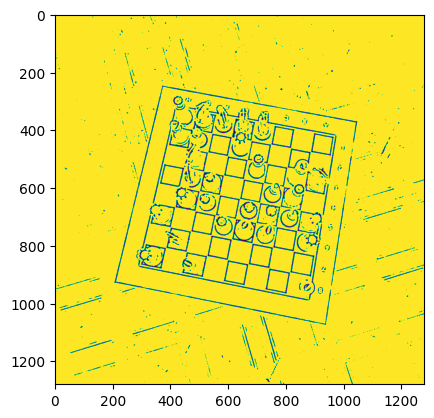

In [132]:
adaptive_mean_threshold(read_image(filename), 9, 7)

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

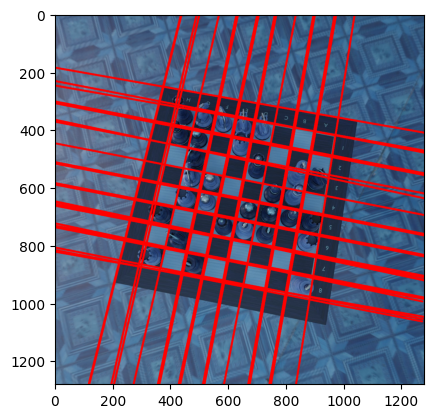

In [145]:
def hough_line_detect_test(img, threshold=120, canny_thr=(10, 200)):
    edges = adaptive_gaussian_threshold(img, 9, 7)
    # edges = cv.Canny(gray, 50, 200, apertureSize=3)
    lines = cv.HoughLines(edges, 1, np.pi / 180, threshold, None, 0, 0)

    image_copy = np.copy(img)
    line_list, coords = [], []

    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1, y1 = int(x0 + 1450*(-b)), int(y0 + 1450 * a)
            x2, y2 = int(x0 - 1450*(-b)), int(y0 - 1450 * a)
            cv.line(image_copy, (x1,y1), (x2,y2), (255,0,0), 5)
            line_list.append([rho, theta])
            coords.append([x1, y1, x2, y2])
    plt.imshow(image_copy)

    lines_found = {
        'img': image_copy,
        'coords': coords,
        'list': line_list,
        'count': len(line_list)
    }
    return lines_found
    # kernel = np.ones((1, 1),np.uint8)
    # edges = cv.dilate(edges, None)
    # lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=90, maxLineGap=150)
    #
    # image_copy = np.copy(img)
    #
    # for line in lines:
    #     for x1,y1,x2,y2 in line:
    #         cv.line(image_copy,(x1,y1),(x2,y2),(255,0,0),5)
    # plt.imshow(image_copy)
    #
    # lines_found = {
    #     'img': image_copy,
    #     'list': lines,
    #     'count': len(lines)
    # }
    # return lines_found

hough_line_detect_test(read_image(filename))

## Harris corner detector

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

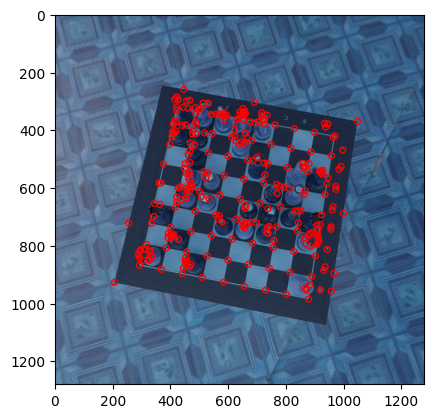

In [9]:
def harris_corner_response(img, threshold=0.03):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.blur(gray, (5,5))
    dst = cv.cornerHarris(blur, 2, 3, 0.04)

    # kernel = np.ones((2, 2),np.uint8)
    # dst = cv.dilate(dst, kernel, iterations = 1)
    dst = cv.dilate(dst, None)
    ret, dst = cv.threshold(dst, threshold*dst.max(), 255, 0)
    dst = np.uint8(dst)

    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, threshold)
    corner_list = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    num_corners = np.sum(dst > threshold * dst.max())

    image_copy = np.copy(img)
    for point in corner_list:
        cv.circle(image_copy, (round(point[0]), round(point[1])), 10, (255, 0, 0), 3)
    plt.imshow(image_copy)

    corners = {
        'img': image_copy,
        'list': corner_list,
        'count': num_corners
    }
    return corners

harris_corner_response(read_image(filename))

## Hough line detection by using HoughLines()

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

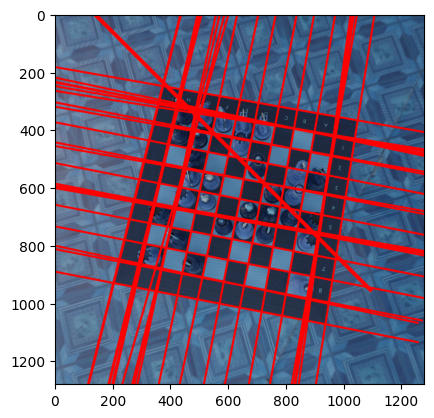

In [7]:
def hough_line_detect_response(img, threshold=120, canny_thr=(10, 200)):
    edges = canny_edge_response(img, canny_thr[0], canny_thr[1])
    # edges = cv.Canny(gray, 50, 200, apertureSize=3)
    lines = cv.HoughLines(edges, 1, np.pi / 180, threshold, None, 0, 0)

    image_copy = np.copy(img)
    line_list, coords = [], []

    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1, y1 = int(x0 + 1450*(-b)), int(y0 + 1450 * a)
            x2, y2 = int(x0 - 1450*(-b)), int(y0 - 1450 * a)
            cv.line(image_copy, (x1,y1), (x2,y2), (255,0,0), 5)
            line_list.append([rho, theta])
            coords.append([x1, y1, x2, y2])
    plt.imshow(image_copy)

    lines_found = {
        'img': image_copy,
        'coords': coords,
        'list': line_list,
        'count': len(line_list)
    }
    return lines_found

hough_line_detect_response(read_image(filename))

## Finding the intersections of the lines of HoughLines()

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

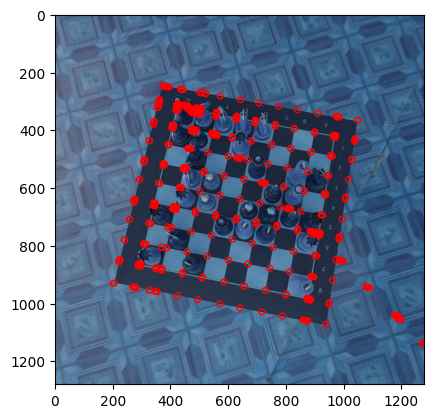

In [8]:
# finding the intersections of the obtained lines
# first, we classify the lines into horizontal and vertical ones
# then, we calculate the intersections

def hough_line_intersections(img, threshold=120, canny_thr=(10, 200)):
    points = []
    lines = hough_line_detect_response(img, threshold, canny_thr)
    horizontals, verticals = [], []

    for rho, theta in lines['list']:
        if theta < np.pi / 4 or theta > 3 * np.pi / 4:
            verticals.append([rho, theta])
        else:
            horizontals.append([rho, theta])

    image_copy = np.copy(img)

    for rho_v, theta_v in verticals:
        for rho_h, theta_h in horizontals:
            a = np.array([
                [np.cos(theta_v), np.sin(theta_v)],
                [np.cos(theta_h), np.sin(theta_h)]
            ])
            b = np.array([rho_v, rho_h])
            intersection = np.linalg.solve(a, b)
            if intersection[0] < img.shape[0] and intersection[1] < img.shape[1]:
                points.append([np.round(intersection[0]), np.round(intersection[1])])
                cv.circle(image_copy, (round(intersection[0]), round(intersection[1])), 10, (255, 0, 0), 3)

    points.sort()
    plt.imshow(image_copy)
    intersections = {
        'img': image_copy,
        'list': points,
        'count': len(points)
    }

    return intersections

hough_line_intersections(read_image(filename))

## Hough line detection by using HoughLinesP()

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

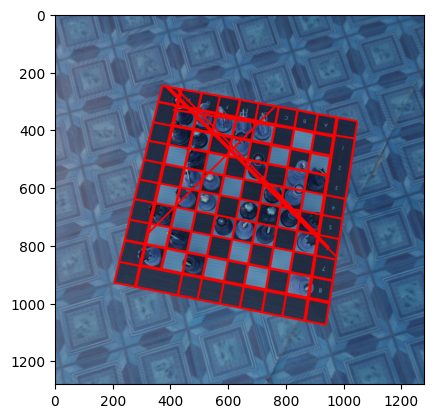

In [9]:
def houghp_line_detect_response(img, threshold=90, minLineLength=100, maxLineGap=150, canny_thr=(10, 200)):
    edges = canny_edge_response(img, canny_thr[0], canny_thr[1])

    # kernel = np.ones((1, 1),np.uint8)
    # edges = cv.dilate(edges, None)
    lines = cv.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)

    image_copy = np.copy(img)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv.line(image_copy,(x1,y1),(x2,y2),(255,0,0),5)
    plt.imshow(image_copy)

    lines_found = {
        'img': image_copy,
        'list': lines,
        'count': len(lines)
    }
    return lines_found

houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)

Just because we get the coordinates of these lines in a nested list, we have to rearrange the list

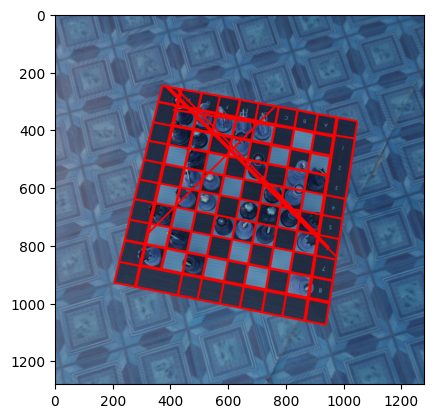

In [13]:
houghp_lines = houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)
list_of_lines = []
for line_list in houghp_lines['list'].tolist():
    list_of_lines.append(line_list.pop())

## Extracting coordinates from the lines obtained by HoughLinesP()

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

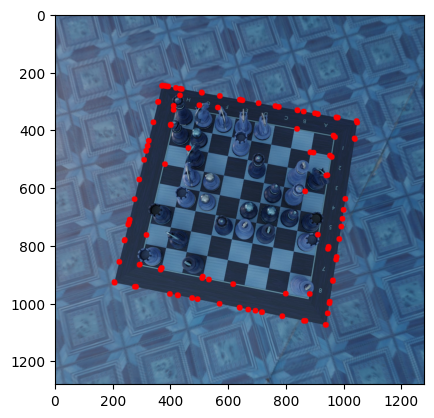

In [10]:
def houghp_line_points(img, threshold=90, minLineLength=100, maxLineGap=150, canny_thr=(10, 200)):
    houghp_lines = houghp_line_detect_response(img, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap, canny_thr=canny_thr)
    point_list = []
    image_copy = np.copy(img)

    for line_list in houghp_lines['list'].tolist():
        line_coords = line_list.pop()
        cv.circle(image_copy, (round(line_coords[0]), round(line_coords[1])), 10, (255, 0, 0), -1)
        cv.circle(image_copy, (round(line_coords[2]), round(line_coords[3])), 10, (255, 0, 0), -1)
        point_list.append(line_coords[:2])
        point_list.append(line_coords[2:])

    plt.imshow(image_copy)

    points_found = {
        'img': image_copy,
        'list': point_list,
        'count': len(point_list)
    }

    return points_found

houghp_line_points(read_image(filename))

## Selecting the corners from each point, prior to calibrating the picture

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

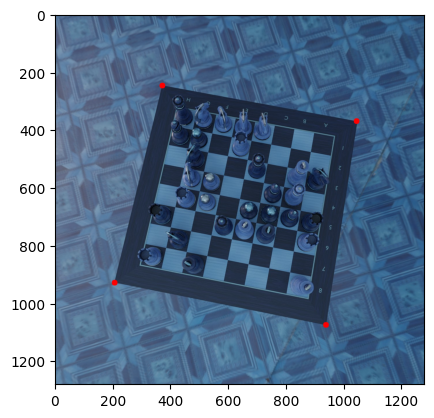

In [23]:
import operator

def get_corners(point_list):
    points = point_list['list']

    # Use of `operator.itemgetter` with `max` and `min` allows us to get the index of the point
	# Each point is an array of 1 coordinate, hence the [0] getter, then [0] or [1] used to get x and y respectively.

    # Bottom-right point has the largest (x + y) value
	# Top-left has point smallest (x + y) value
	# Bottom-left point has smallest (x - y) value
	# Top-right point has largest (x - y) value

    bottom_right, _ = max(enumerate([pt[0] + pt[1] for pt in points]), key=operator.itemgetter(1))
    top_left, _ = min(enumerate([pt[0] + pt[1] for pt in points]), key=operator.itemgetter(1))
    bottom_left, _ = min(enumerate([pt[0] - pt[1] for pt in points]), key=operator.itemgetter(1))
    top_right, _ = max(enumerate([pt[0] - pt[1] for pt in points]), key=operator.itemgetter(1))

    return [points[top_left], points[top_right], points[bottom_right], points[bottom_left]]

def corners_on_image(img, point_func):
    corners = get_corners(point_func(img))
    image_copy = np.copy(img)

    for corner in corners:
        cv.circle(image_copy, (round(corner[0]), round(corner[1])), 10, (255, 0, 0), -1)
    plt.imshow(image_copy)

    corners_found = {
        'img': image_copy,
        'list': corners,
    }

    return corners_found

corners_on_image(read_image(filename), houghp_line_points)

Now that we have the coordinates from each corner of the chessboard, we can crop/warp the image so that we get the chessboard from the image at a closer look

array([[[ 98, 129, 162],
        [ 92, 125, 158],
        [ 89, 119, 154],
        ...,
        [ 74, 120, 161],
        [ 74, 121, 159],
        [ 72, 119, 157]],

       [[ 96, 127, 160],
        [ 94, 127, 160],
        [ 91, 121, 156],
        ...,
        [ 72, 118, 159],
        [ 72, 119, 157],
        [ 72, 119, 157]],

       [[ 97, 128, 161],
        [ 97, 128, 161],
        [ 94, 122, 157],
        ...,
        [ 71, 117, 158],
        [ 71, 118, 156],
        [ 71, 118, 156]],

       ...,

       [[ 74,  98, 134],
        [ 75,  97, 133],
        [ 73,  95, 130],
        ...,
        [ 62, 100, 135],
        [ 62, 100, 135],
        [ 63, 101, 136]],

       [[ 76,  98, 134],
        [ 76,  98, 134],
        [ 73,  95, 130],
        ...,
        [ 57,  93, 129],
        [ 58,  94, 130],
        [ 60,  96, 132]],

       [[ 75,  99, 135],
        [ 76,  98, 134],
        [ 74,  96, 131],
        ...,
        [ 53,  89, 125],
        [ 54,  90, 126],
        [ 56,  92, 128]]

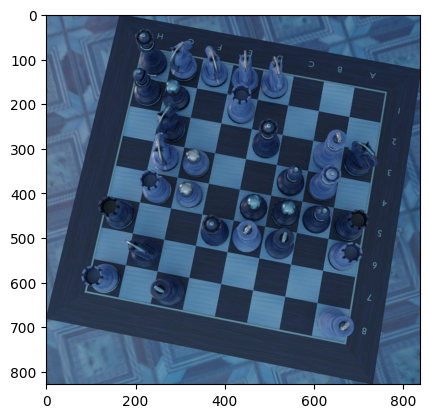

In [24]:
def crop_image(img, point_func):
    corners = get_corners(point_func(img))
    image_copy = np.copy(img)

    min_x = int(min(corners, key=operator.itemgetter(0))[0])
    max_x = int(max(corners, key=operator.itemgetter(0))[0])
    min_y = int(min(corners, key=operator.itemgetter(1))[1])
    max_y = int(max(corners, key=operator.itemgetter(1))[1])

    cropped_image = image_copy[min_y:max_y, min_x:max_x]

    plt.imshow(cropped_image)

    return cropped_image

crop_image(read_image(filename), houghp_line_points)

array([[[ 35,  49,  78],
        [ 33,  46,  75],
        [ 32,  45,  74],
        ...,
        [ 56,  86, 116],
        [ 59,  89, 120],
        [ 63,  94, 125]],

       [[ 34,  46,  76],
        [ 31,  44,  73],
        [ 32,  44,  74],
        ...,
        [ 43,  68,  98],
        [ 42,  69,  98],
        [ 41,  69, 100]],

       [[ 32,  43,  73],
        [ 29,  40,  70],
        [ 32,  43,  73],
        ...,
        [ 27,  48,  77],
        [ 23,  47,  75],
        [ 20,  45,  75]],

       ...,

       [[ 37,  58,  87],
        [ 33,  53,  80],
        [ 37,  53,  80],
        ...,
        [ 27,  48,  75],
        [ 29,  51,  79],
        [ 35,  58,  88]],

       [[ 50,  70, 101],
        [ 51,  70,  99],
        [ 53,  70,  98],
        ...,
        [ 27,  49,  77],
        [ 30,  53,  83],
        [ 35,  59,  90]],

       [[ 66,  86, 117],
        [ 67,  86, 115],
        [ 67,  85, 114],
        ...,
        [ 34,  57,  86],
        [ 35,  59,  90],
        [ 38,  63,  95]]

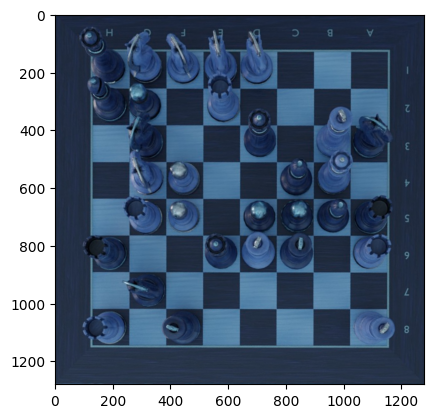

In [25]:
def warp_image(img, point_func):
    corners = get_corners(point_func(img))
    image_copy = np.copy(img)

    height, width, _ = image_copy.shape
    dest_points = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype=np.float32)
    corners = np.array(corners, dtype=np.float32)

    perspectiveMatrix = cv.getPerspectiveTransform(corners, dest_points)
    cropped_image = cv.warpPerspective(img, perspectiveMatrix, (width, height))

    plt.imshow(cropped_image)

    return cropped_image

warp_image(read_image(filename), houghp_line_points)